In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd

tmdb = pd.read_csv("/content/drive/MyDrive/Alura/Testes Estatísticos com Python/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
import seaborn as sns

sns.set_palette("Accent")
sns.set_style("darkgrid")

Text(0, 0.5, 'Frequência')

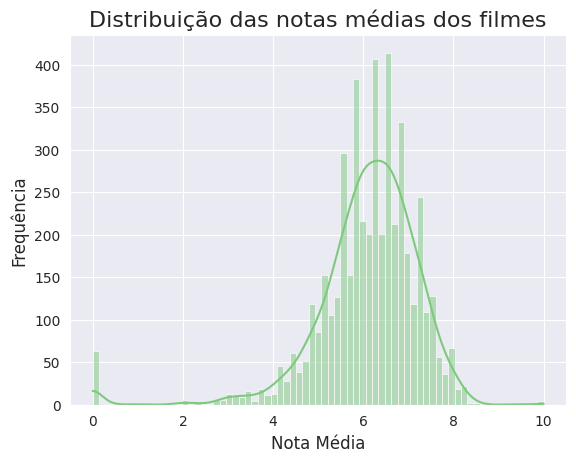

In [6]:
ax = sns.histplot(tmdb["vote_average"], kde=True)

ax.set_title("Distribuição das notas médias dos filmes", fontsize=16)
ax.set_xlabel("Nota Média", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

Text(0.5, 0, 'Nota Média')

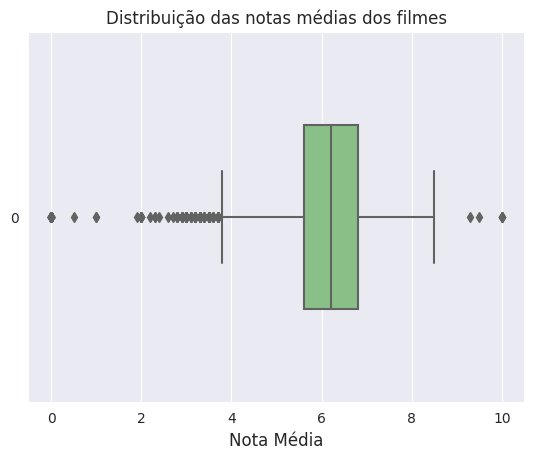

In [7]:
ax = sns.boxplot(tmdb["vote_average"], orient="h",  width=0.5)

ax.set_title("Distribuição das notas médias dos filmes", fontsize=12)
ax.set_xlabel("Nota Média", fontsize=12)

Filmes com menos de 10 votos não fazem sentido para a análise. Portanto esses filmes serão removidos do dataframe.

In [8]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0, 0.5, 'Frequência')

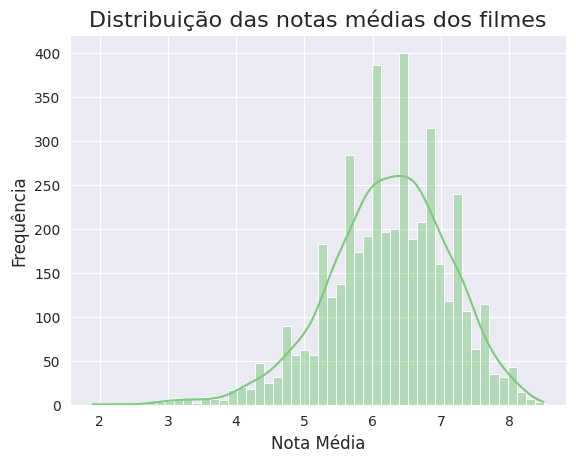

In [9]:
ax = sns.histplot(tmdb_com_mais_de_10_votos["vote_average"], kde=True)

ax.set_title("Distribuição das notas médias dos filmes", fontsize=16)
ax.set_xlabel("Nota Média", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

Text(0.5, 0, 'Nota Média')

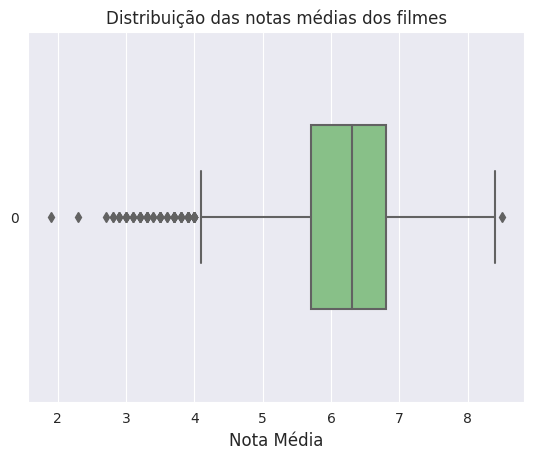

In [10]:
ax = sns.boxplot(tmdb_com_mais_de_10_votos["vote_average"], orient="h",  width=0.5)

ax.set_title("Distribuição das notas médias dos filmes", fontsize=12)
ax.set_xlabel("Nota Média", fontsize=12)

Text(0, 0.5, 'Frequência')

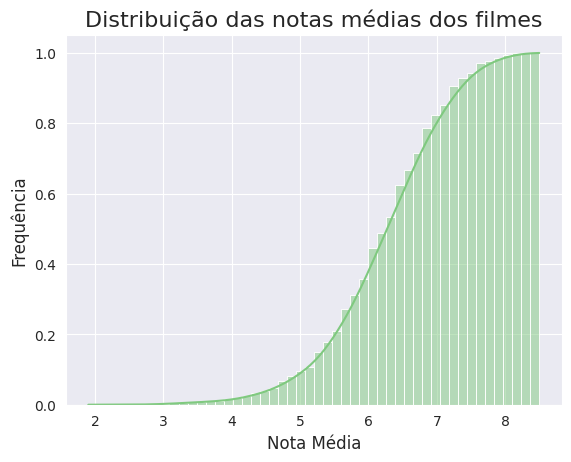

In [11]:
ax = sns.histplot(tmdb_com_mais_de_10_votos["vote_average"], kde=True, cumulative=True, stat="density")

ax.set_title("Distribuição das notas médias dos filmes", fontsize=16)
ax.set_xlabel("Nota Média", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

Analizando também o movielens

In [12]:
movielens = pd.read_csv("/content/drive/MyDrive/Alura/Testes Estatísticos com Python/ratings.csv")
movielens.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
notas = movielens.groupby("movieId").mean()["rating"]
notas.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0, 0.5, 'Frequência')

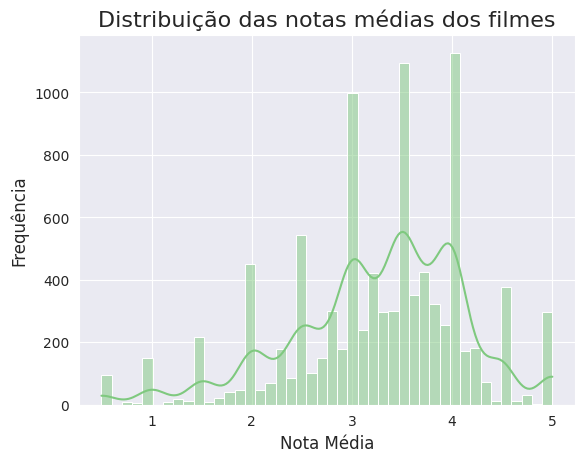

In [14]:
ax = sns.histplot(notas, kde=True)

ax.set_title("Distribuição das notas médias dos filmes", fontsize=16)
ax.set_xlabel("Nota Média", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

In [15]:
quantidade_de_votos = movielens.groupby("movieId").count()
quantidade_de_votos = quantidade_de_votos.query("rating >= 10").index
quantidade_de_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [16]:
notas_com_mais_de_10_pessoas = notas.loc[quantidade_de_votos.values]
notas_com_mais_de_10_pessoas

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

Text(0, 0.5, 'Frequência')

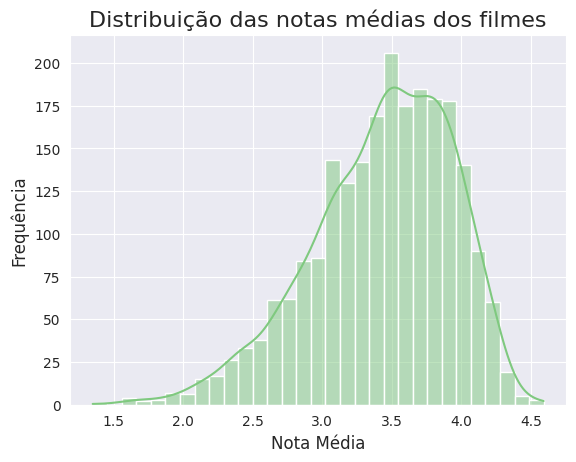

In [17]:
ax = sns.histplot(notas_com_mais_de_10_pessoas, kde=True)

ax.set_title("Distribuição das notas médias dos filmes", fontsize=16)
ax.set_xlabel("Nota Média", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

Text(0.5, 0, 'Nota Média')

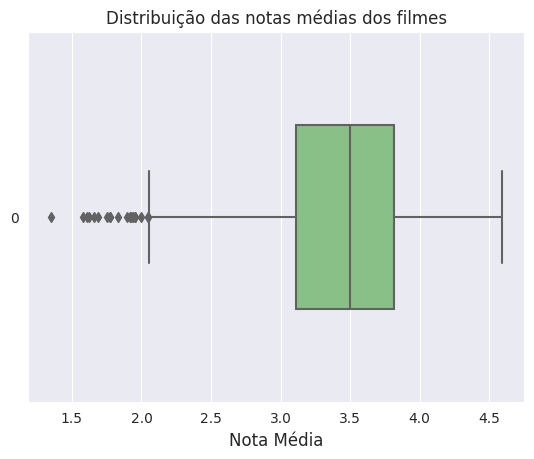

In [18]:
ax = sns.boxplot(notas_com_mais_de_10_pessoas.values, orient="h",  width=0.5)

ax.set_title("Distribuição das notas médias dos filmes", fontsize=12)
ax.set_xlabel("Nota Média", fontsize=12)

Text(0, 0.5, 'Densidade Acumulada')

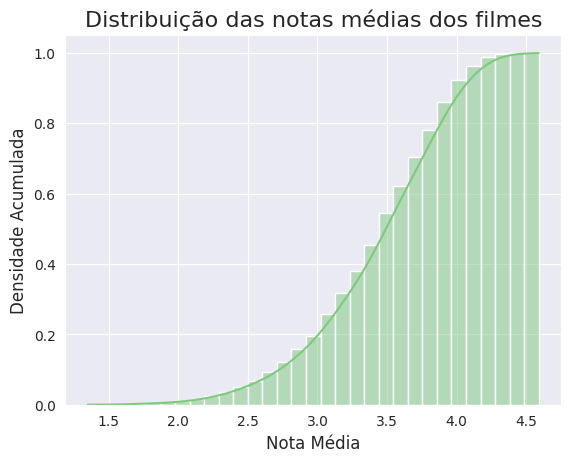

In [19]:
ax = sns.histplot(notas_com_mais_de_10_pessoas, kde=True, cumulative=True, stat="density")

ax.set_title("Distribuição das notas médias dos filmes", fontsize=16)
ax.set_xlabel("Nota Média", fontsize=12)
ax.set_ylabel("Densidade Acumulada", fontsize=12)

Analisando a distribuição de outros dados do TMDB

Text(0, 0.5, 'Frequência')

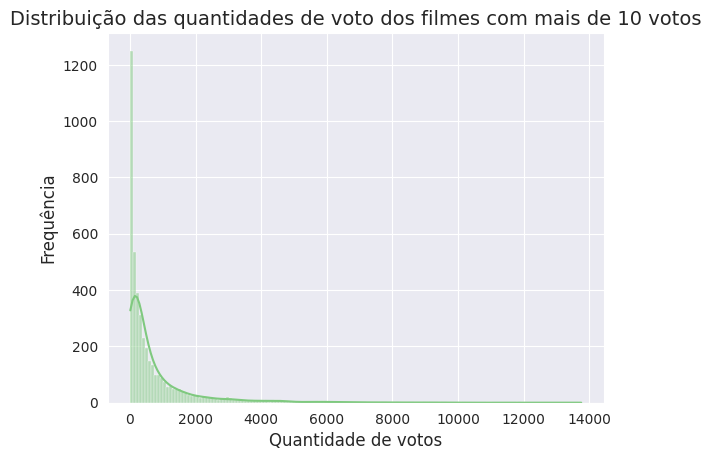

In [20]:
ax = sns.histplot(tmdb_com_mais_de_10_votos["vote_count"], kde=True)

ax.set_title("Distribuição das quantidades de voto dos filmes com mais de 10 votos", fontsize=14)
ax.set_xlabel("Quantidade de votos", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

In [21]:
tmdb_com_orcamento = tmdb.query("budget >= 0")

Text(0, 0.5, 'Frequência')

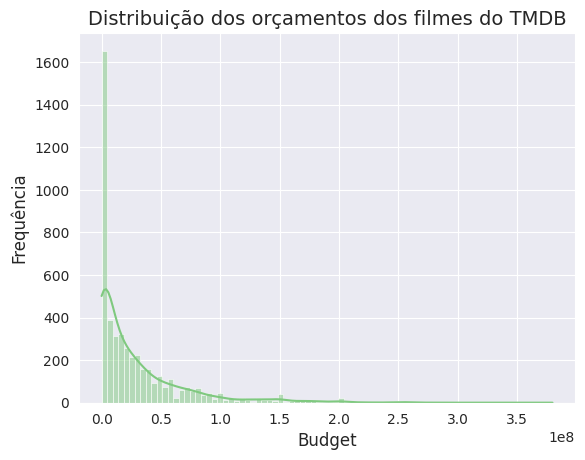

In [22]:
ax = sns.histplot(tmdb_com_orcamento["budget"], kde=True)

ax.set_title("Distribuição dos orçamentos dos filmes do TMDB", fontsize=14)
ax.set_xlabel("Budget", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

Text(0, 0.5, 'Frequência')

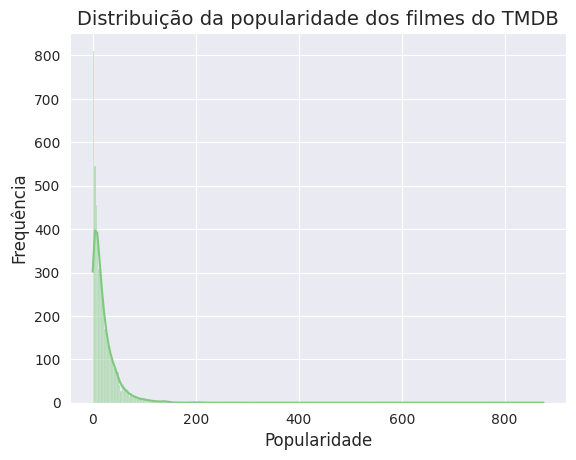

In [23]:
ax = sns.histplot(tmdb["popularity"], kde=True)

ax.set_title("Distribuição da popularidade dos filmes do TMDB", fontsize=14)
ax.set_xlabel("Popularidade", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

In [24]:
tmdb["runtime"].isna().sum()

2

In [25]:
tmdb_com_runtime = tmdb.query("runtime >= 0")

In [26]:
tmdb_com_runtime = tmdb["runtime"].dropna()

Text(0, 0.5, 'Frequência')

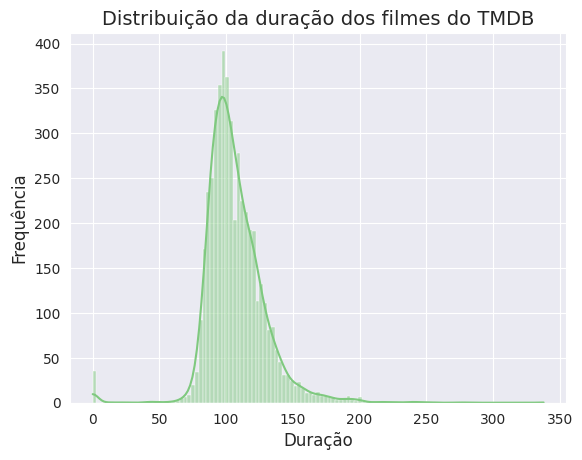

In [27]:
ax = sns.histplot(tmdb_com_runtime, kde=True)

ax.set_title("Distribuição da duração dos filmes do TMDB", fontsize=14)
ax.set_xlabel("Duração", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

Text(0, 0.5, 'Frequência')

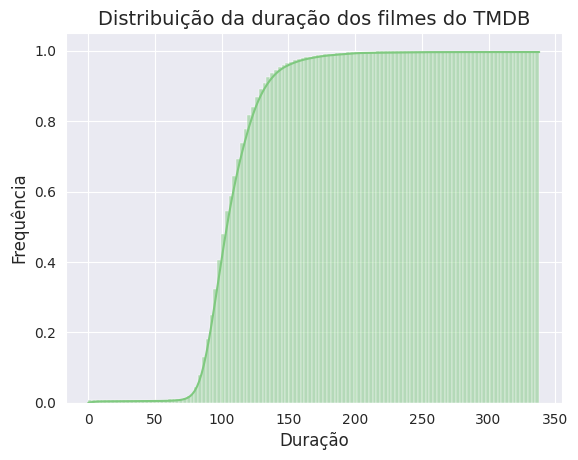

In [28]:
ax = sns.histplot(tmdb_com_runtime, kde=True, stat="density", cumulative=True)

ax.set_title("Distribuição da duração dos filmes do TMDB", fontsize=14)
ax.set_xlabel("Duração", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

Movielens: Média das notas dos filmes com pelo menos 10 votos

In [29]:
print(f"Média dos filmes com pelo menos 10 votos = {notas_com_mais_de_10_pessoas.mean()}")

Média dos filmes com pelo menos 10 votos = 3.4320503405352594


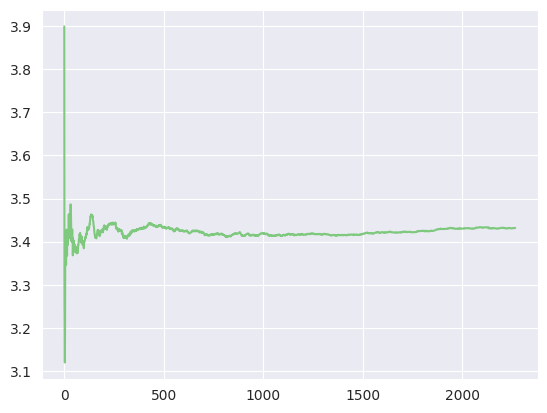

In [30]:
import matplotlib.pyplot as plt

temp = notas_com_mais_de_10_pessoas.sample(frac=1, random_state=101)

medias = [temp[0:i].mean() for i in range(1,len(temp))]

plt.plot(medias)

In [31]:
from statsmodels.stats.weightstats import zconfint

zconfint(notas_com_mais_de_10_pessoas)

(3.4112459477469557, 3.452854733323563)

In [32]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(notas_com_mais_de_10_pessoas)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

Analisando média dos filmes separadamente

In [33]:
filmes = pd.read_csv("/content/drive/MyDrive/Alura/Testes Estatísticos com Python/movies.csv")
filmes.query("movieId==1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [34]:
notas1 = movielens.query("movieId == 1")
notas1["rating"].mean()

3.9209302325581397

Text(0.5, 1.0, 'Distribuição de notas do Toy Story')

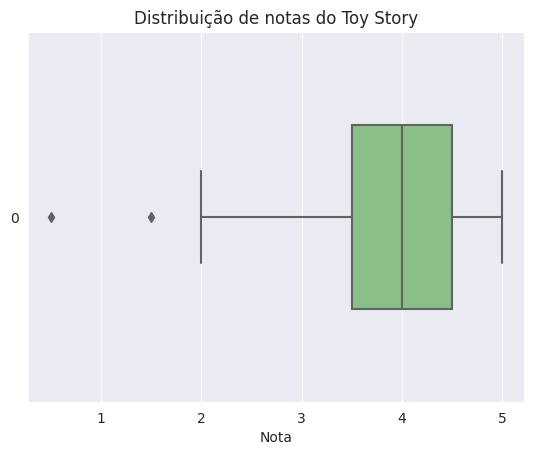

In [35]:
ax = sns.boxplot(notas1["rating"], orient="h", width=0.5)

ax.set_xlabel("Nota")
ax.set_title("Distribuição de notas do Toy Story")

In [36]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [37]:
from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

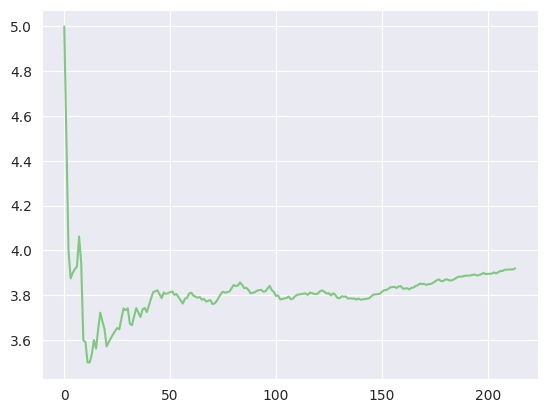

In [38]:
import numpy as np
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

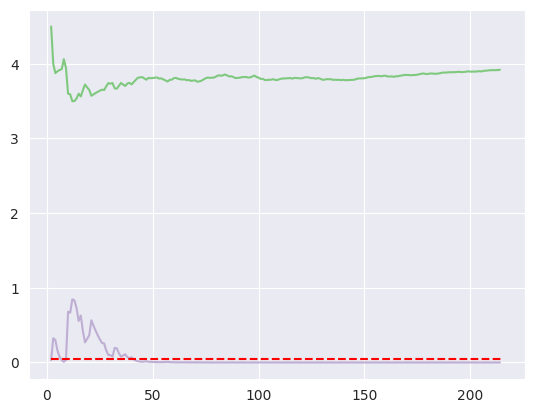

In [39]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352603) 
    return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])
valores

plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y= 0.05, xmin=2, xmax=len(temp), colors = "r", linestyle = "--")

Comparação entre a amostra de Toy Story com as notas de todos filmes

In [40]:
print(ztest(notas1.rating, movielens.rating))
zconfint(notas1.rating, movielens.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [41]:
from scipy.stats import ttest_ind

ttest_ind(movielens.rating, notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [44]:
descr_todas_as_notas = DescrStatsW(movielens.rating)
descr_toystory = DescrStatsW(notas1.rating)
descr_todas_as_notas.get_compare(descr_toystory).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f823e0550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f8cbfd060>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f82332680>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0f8caa87c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f83d36920>,
 'means': []}

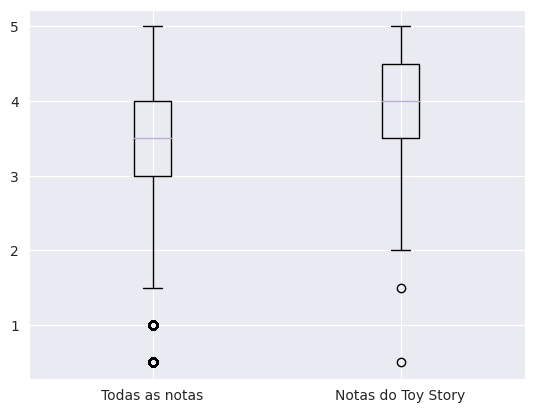

In [46]:
plt.boxplot([movielens.rating, notas1.rating], labels=["Todas as notas", "Notas do Toy Story"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f82589c60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f825891b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f8258b580>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0f825884c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f83a06170>,
 'means': []}

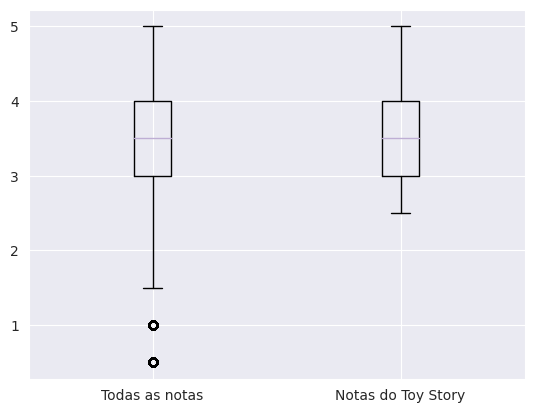

In [47]:
plt.boxplot([movielens.rating, notas1[3:12].rating], labels=["Todas as notas", "Notas do Toy Story"])

In [51]:
print(notas1[3:12].rating.mean())


3.5555555555555554


In [52]:
descr_todas_as_notas = DescrStatsW(movielens.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
descr_todas_as_notas.get_compare(descr_toystory).summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


Comparar a média de dois filmes

In [54]:
filmes.query("movieId in [1, 593, 72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f81b77d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f81b74c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f81b76aa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0f81b75090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f81b75360>,
 'means': []}

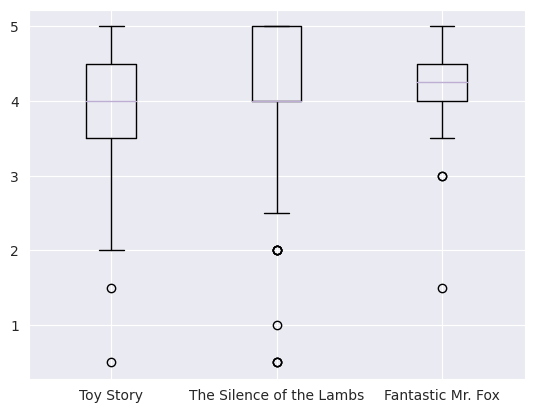

In [57]:
notas593 = movielens.query("movieId == 593")
notas72226 = movielens.query("movieId == 72226")

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating], labels=["Toy Story", "The Silence of the Lambs", "Fantastic Mr. Fox"])

In [66]:
movielens.query("movieId in [1, 593, 72226]").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [62]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
descr_593.get_compare(descr_1).summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.2404,0.077,3.132,0.002,0.090,0.391


In [68]:
descr_593 = DescrStatsW(notas593.rating)
descr_72226 = DescrStatsW(notas72226.rating)
descr_72226.get_compare(descr_593).summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [67]:
descr_1 = DescrStatsW(notas1.rating)
descr_72226 = DescrStatsW(notas72226.rating)
descr_72226.get_compare(descr_1).summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1624,0.206,0.788,0.431,-0.243,0.568


Analisando a normalidade das notas do toy story

In [70]:
from scipy.stats import normaltest

_, p = normaltest(notas1.rating)
p

0.00011053430732728716

In [71]:
from scipy.stats import normaltest

_, p = normaltest(notas593.rating)
p

4.667833086075242e-19

In [72]:
from scipy.stats import ranksums

_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693